Problem A: Vendor Scoring — Predict High Performing Vendors

Business Use Case:
Classify vendors as High Performers based on sales efficiency (SalesToPurchaseRatio) and profitability (ProfitMargin). Helps procurement teams identify top vendors.

Technical Approach:
-Define HighPerformer with custom business logic
-Train logistic regression classifier
-Evaluate performance (accuracy, confusion matrix)
-Analyze top predictive features

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ✅ Load the original data
df = pd.read_csv("vendor_sales_summary.csv")

# ✅ Define HighPerformer column first
df['HighPerformer'] = df.apply(lambda row: 'Yes' if (row['ProfitMargin'] > 0.8 and row['SalestoPurchaseRatio'] > 1) else 'No', axis=1)

# ✅ Drop identifier and text-heavy columns
cols_to_drop = ['VendorNumber', 'VendorName', 'Brand', 'Description']
X = df.drop(columns=cols_to_drop + ['HighPerformer'])

# ✅ Convert HighPerformer to binary labels
y = df['HighPerformer'].map({'Yes': 1, 'No': 0})

# ✅ One-hot encode remaining categorical columns (if any)
X_encoded = pd.get_dummies(X, drop_first=True)

# ✅ Final check: ensure no NaNs remain
X_encoded = X_encoded.dropna()
y = y.loc[X_encoded.index]  # Align indices just in case

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("✅ Final Train shape:", X_train.shape)
print("✅ Final Test shape:", X_test.shape)

# ✅ Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# ✅ Predict
y_pred = logreg.predict(X_test)


✅ Final Train shape: (6852, 18)
✅ Final Test shape: (1713, 18)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Accuracy: 0.9994162288382954

📊 Confusion Matrix:
 [[   7    0]
 [   1 1705]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00      1706

    accuracy                           1.00      1713
   macro avg       0.94      1.00      0.97      1713
weighted avg       1.00      1.00      1.00      1713



C:\Users\chira\AppData\Local\Temp\ipykernel_27348\906005926.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


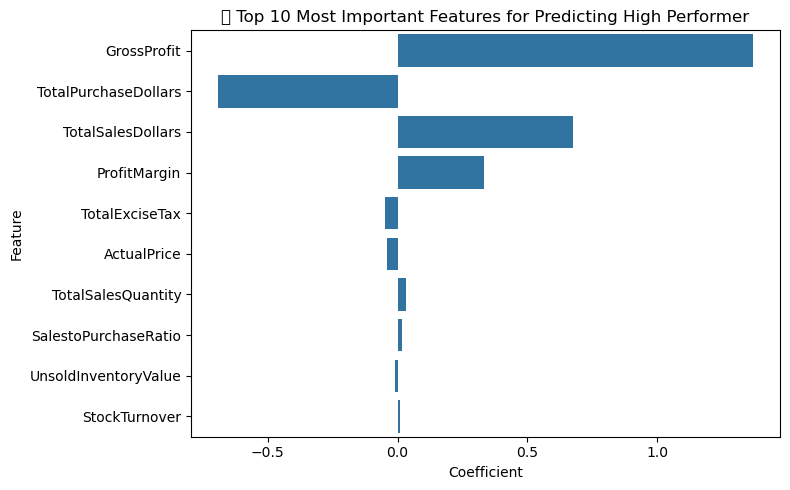

In [48]:
#Let’s see which features are contributing most to predicting "High Performer":
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
coefficients = pd.Series(logreg.coef_[0], index=X_encoded.columns)
top_features = coefficients.sort_values(key=abs, ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("🔍 Top 10 Most Important Features for Predicting High Performer")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Problem B: Predicting Profit Margin
Goal: Use vendor-related features to predict the ProfitMargin (a continuous value) for each record.

This is a regression problem (unlike Problem A which was classification).

Drop unnecessary columns,
Define features (X) and target (y),
Train-test split,
Train a regression model (e.g., LinearRegression),
Evaluate model using R² and RMSE,
(Optional) Show feature importances

In [53]:
# 1. Import necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 2. Drop non-numeric and irrelevant columns
cols_to_drop = ['VendorNumber', 'VendorName', 'Brand', 'Description', 'HighPerformer']  # 'HighPerformer' is not needed here
df_reg = df.dropna(subset=['ProfitMargin'])  # Just in case

X = df_reg.drop(columns=cols_to_drop + ['ProfitMargin'])  # Features
y = df_reg['ProfitMargin']                                # Target

# 3. One-hot encode if needed
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 5. Train model
linreg = LinearRegression()
linreg.fit(X_train_reg, y_train_reg)

# 6. Predict
y_pred_reg = linreg.predict(X_test_reg)

# 7. Evaluate
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("📈 RMSE:", rmse)
print("📊 R² Score:", r2)


📈 RMSE: 16.81885609205844
📊 R² Score: 0.3894174134555253


C:\Users\chira\AppData\Local\Temp\ipykernel_27348\2020905619.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
C:\Users\chira\AppData\Local\Temp\ipykernel_27348\2020905619.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


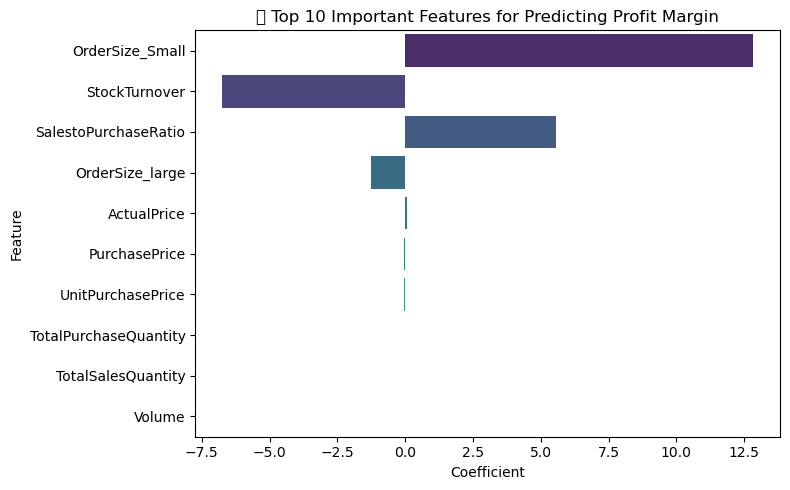

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Coefficients
coefficients = pd.Series(linreg.coef_, index=X_encoded.columns)
top_features = coefficients.sort_values(key=abs, ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("📊 Top 10 Important Features for Predicting Profit Margin")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


C:\Users\chira\AppData\Local\Temp\ipykernel_27348\28435295.py:7: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


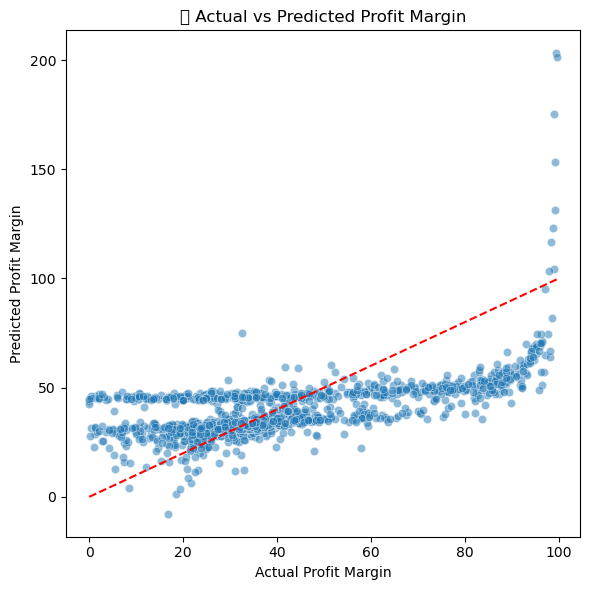

In [57]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Profit Margin")
plt.ylabel("Predicted Profit Margin")
plt.title("🔎 Actual vs Predicted Profit Margin")
plt.tight_layout()
plt.show()


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_reg, y_train_reg)

# Predict
y_pred_rf = rf.predict(X_test_reg)

# Evaluate
rmse_rf = mean_squared_error(y_test_reg, y_pred_rf, squared=False)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("🌲 Random Forest RMSE:", rmse_rf)
print("🌲 Random Forest R² Score:", r2_rf)


🌲 Random Forest RMSE: 0.018307397060894282
🌲 Random Forest R² Score: 0.9999992765563537


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We have now built a model that can - Predict Profit Margin for new vendors or products with extreme confidence.

This could be used to:

~Identify high-margin opportunities
~Forecast profitability of new products
~Support negotiations with vendors
~Detect outliers or data errors

In [67]:
#last problem 

Problem C: Predicting Inventory Risk (Low Stock Turnover)
Business Goal:
Identify vendors at inventory risk — i.e., those who have very low stock turnover and may be tying up capital or leading to overstocking.

We'll classify vendors as:
Risky: Low stock turnover  ,
Safe: Otherwise

In [72]:
# Define the 15th percentile threshold
threshold = df['StockTurnover'].quantile(0.15)

# Create target column
df['InventoryRisk'] = df['StockTurnover'].apply(lambda x: 'Risky' if x < threshold else 'Safe')

# Check balance
print(df['InventoryRisk'].value_counts())


InventoryRisk
Safe     7280
Risky    1285
Name: count, dtype: int64


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Drop unnecessary columns
cols_to_drop = ['VendorNumber', 'VendorName', 'Brand', 'Description', 'HighPerformer', 'StockTurnover']
X = df.drop(columns=cols_to_drop + ['InventoryRisk'])
y = df['InventoryRisk'].map({'Risky': 1, 'Safe': 0})  # 1 = Risky, 0 = Safe

# One-hot encode
X_encoded = pd.get_dummies(X, drop_first=True)

# Align y
X_encoded = X_encoded.dropna()
y = y.loc[X_encoded.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (6852, 17)
Test shape: (1713, 17)


In [76]:
# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Accuracy: 0.9678925861062464

📊 Confusion Matrix:
 [[1454   14]
 [  41  204]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1468
           1       0.94      0.83      0.88       245

    accuracy                           0.97      1713
   macro avg       0.95      0.91      0.93      1713
weighted avg       0.97      0.97      0.97      1713



C:\Users\chira\AppData\Local\Temp\ipykernel_27348\1393355714.py:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


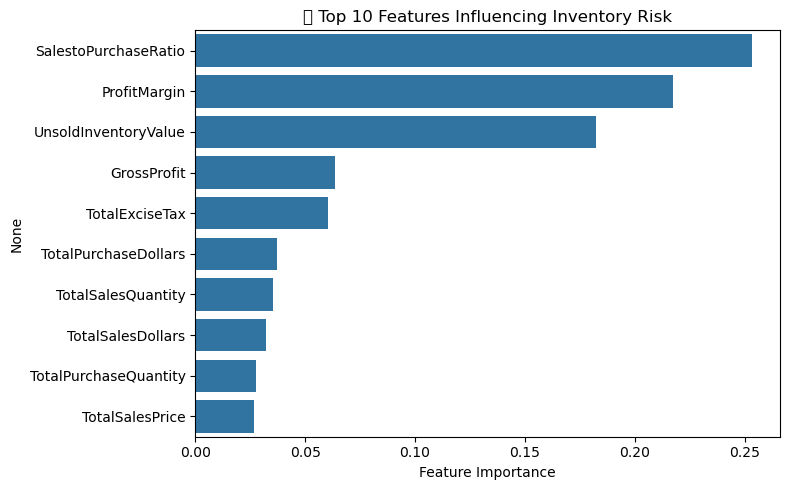

In [78]:
# Top predictors
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("🔍 Top 10 Features Influencing Inventory Risk")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()
